In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Data/UrbanSound8K.csv')
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
import os
import librosa
import librosa.display
from tqdm import tqdm, trange
from tqdm.auto import tqdm
import IPython.display as ipd


d:\Vegeta\Projects\DL projects\Urban sound classification\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dat1, sampling_rate1 = librosa.load('Data/fold5/100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('Data/fold5/100263-2-0-117.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

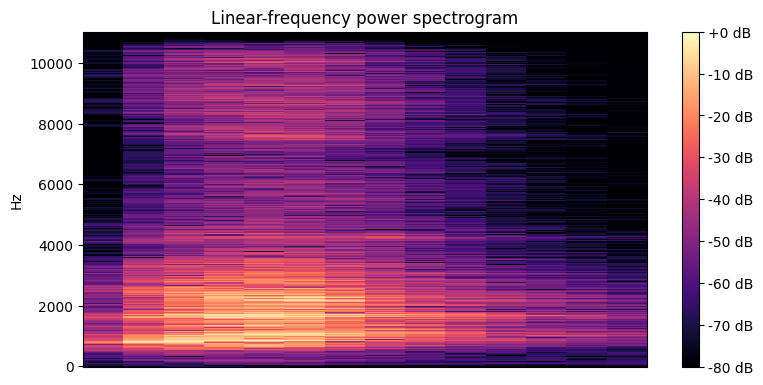

In [5]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

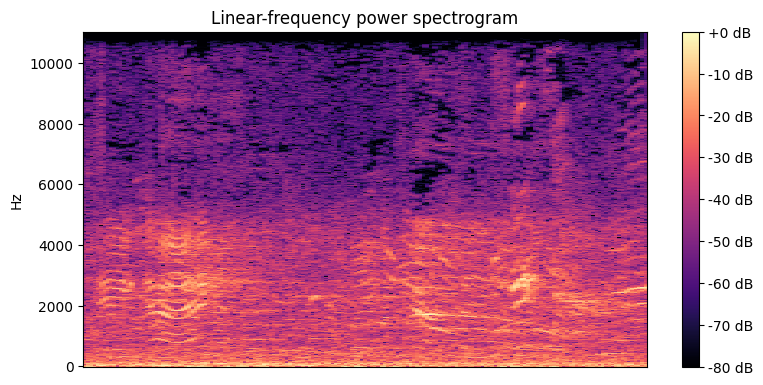

In [6]:
plt.figure(figsize=(20, 20))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

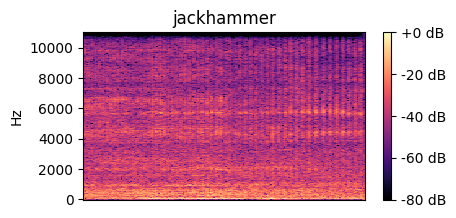

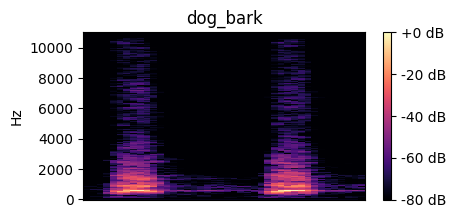

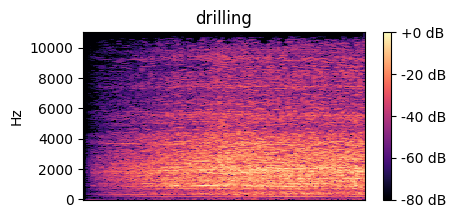

In [7]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = 'Data/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 10))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [15]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, stratify=df['class'], shuffle=True)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df['class'], shuffle=True)

assert train_df['class'].nunique()==test_df['class'].nunique()==val_df['class'].nunique(), 'Classes are not the same in train, test and validation sets'

In [16]:
import utils as ut

ut.create_class_folders(base_dir='Signals/train', classes=train_df['class'].unique())
ut.create_class_folders(base_dir='Signals/val', classes=train_df['class'].unique())
ut.create_class_folders(base_dir='Signals/test', classes=train_df['class'].unique())

Signals/train\engine_idling already exists.
created Signals/val\engine_idling
created Signals/val\air_conditioner
created Signals/val\dog_bark
created Signals/val\drilling
created Signals/val\gun_shot
created Signals/val\car_horn
created Signals/val\children_playing
created Signals/val\street_music
created Signals/val\siren
created Signals/val\jackhammer
created Signals/test\engine_idling
created Signals/test\air_conditioner
created Signals/test\dog_bark
created Signals/test\drilling
created Signals/test\gun_shot
created Signals/test\car_horn
created Signals/test\children_playing
created Signals/test\street_music
created Signals/test\siren
created Signals/test\jackhammer


In [17]:
ut.save_features(data_dir='Data/', output_dir='Signals/test', df=test_df)

 26%|██▌       | 112/437 [00:05<00:16, 19.28it/s]d:\Vegeta\Projects\DL projects\Urban sound classification\env\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
100%|██████████| 437/437 [00:21<00:00, 20.50it/s]

Features saved to Signals/test


In [19]:
ut.save_features(data_dir='Data/', output_dir='Signals/train', df=train_df)

  9%|▉         | 609/6636 [01:08<11:07,  9.02it/s]d:\Vegeta\Projects\DL projects\Urban sound classification\env\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
100%|██████████| 6636/6636 [13:04<00:00,  8.45it/s]

Features saved to Signals/train


In [18]:
ut.save_features(data_dir='Data/', output_dir='Signals/val', df=val_df)

 68%|██████▊   | 1128/1659 [02:05<01:06,  7.97it/s]d:\Vegeta\Projects\DL projects\Urban sound classification\env\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
100%|██████████| 1659/1659 [03:07<00:00,  8.85it/s]

Features saved to Signals/val


In [4]:
import dataset as ds

train_dataset, classes = ds.get_dataloader('Signals/train', batch_size=32, shuffle=True,num_workers=4, pin_memory=True, transform=None)
val_dataset, _ = ds.get_dataloader('Signals/val', batch_size=32, shuffle=False,num_workers=4, pin_memory=True, transform=None)
test_dataset, _ = ds.get_dataloader('Signals/test', batch_size=32, shuffle=False,num_workers=4, pin_memory=True, transform=None)

In [13]:
input_batch, target_batch = next(iter(test_dataset))
print(input_batch.shape), print(target_batch.shape), input_batch[0]

torch.Size([32, 50])
torch.Size([32])


(None,
 None,
 tensor([-5.5451e+01,  8.0460e+01, -4.6328e+01,  4.9525e+01, -2.8649e+00,
          2.3531e+01, -4.5100e+00,  1.5879e+01, -1.4630e+01,  1.1227e+01,
         -1.2162e+01,  9.9913e+00, -1.0829e+01,  1.5424e+01, -1.3064e+01,
          1.3703e+01, -9.6134e+00,  1.1121e+01, -1.0232e+01,  1.3622e+01,
         -6.7991e+00,  5.6584e+00, -5.0480e+00,  6.4585e+00, -7.0255e+00,
          3.6398e+00, -7.3413e+00,  2.4227e+00, -6.8431e+00, -1.6548e+00,
         -8.1712e+00, -1.7117e+00, -5.7557e+00, -1.2956e+00, -4.0005e+00,
         -4.2523e-01, -2.1353e+00,  1.4080e+00, -2.6928e+00,  2.3279e+00,
         -1.3782e-01,  8.3497e-01, -1.4323e+00,  2.7564e+00, -2.6589e+00,
          2.2259e-02, -2.9932e+00, -1.6065e+00, -2.7670e+00, -1.1466e+00]))

In [6]:
import model as md

model = md.SoundModel(input_shape=1, num_classes=len(classes), hidden_size=16)
model

SoundModel(
  (convBlock1): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convBlock2): Sequential(
    (0): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (convBlock3): Sequential(
    (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Linear(in_features=384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=Tr

In [21]:
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

checkpoint = torch.load('checkpoints/checkpoint_9.pth.tar')

model.load_state_dict(checkpoint['model_state_dict'])


C:\Users\Yuval\AppData\Local\Temp\ipykernel_7112\1143037685.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('checkpoints/checkpoint_9.pth.tar')


<All keys matched successfully>

                  precision    recall  f1-score   support

 air_conditioner       1.00      0.82      0.90        50
        car_horn       0.90      0.90      0.90        21
children_playing       0.84      0.64      0.73        50
        dog_bark       0.74      0.90      0.81        50
        drilling       0.86      0.96      0.91        50
   engine_idling       0.98      0.92      0.95        50
        gun_shot       0.89      0.84      0.86        19
      jackhammer       0.94      0.90      0.92        50
           siren       0.93      0.89      0.91        47
    street_music       0.69      0.86      0.77        50

        accuracy                           0.86       437
       macro avg       0.88      0.86      0.87       437
    weighted avg       0.87      0.86      0.86       437



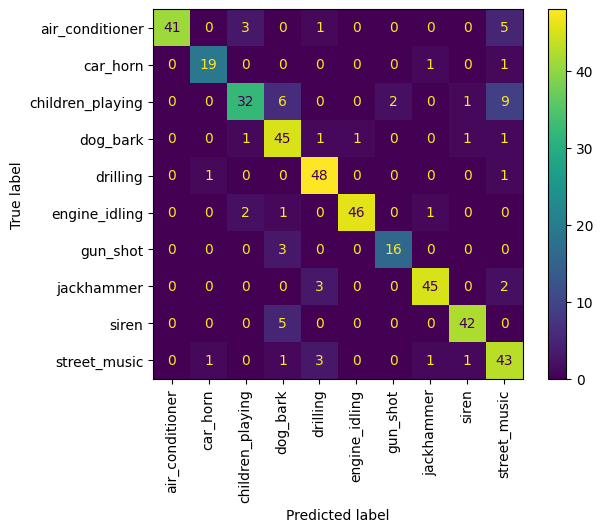

In [29]:

model.eval()
y_true = []
y_pred = []
with torch.inference_mode():
    for i, (input_batch, target_batch) in enumerate(test_dataset):
        output = model(input_batch.unsqueeze(1))
        _, preds = torch.max(output, 1)
        y_true.extend(target_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
    
print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes, )
disp.plot( values_format = 'd', cmap='viridis', xticks_rotation='vertical', ax=None)


                  precision    recall  f1-score   support

 air_conditioner       0.97      0.91      0.94       190
        car_horn       0.99      0.89      0.94        82
children_playing       0.79      0.75      0.77       190
        dog_bark       0.79      0.84      0.81       190
        drilling       0.81      0.93      0.87       190
   engine_idling       0.99      0.91      0.95       190
        gun_shot       0.88      0.79      0.83        71
      jackhammer       0.97      0.92      0.94       190
           siren       0.94      0.90      0.92       176
    street_music       0.77      0.88      0.82       190

        accuracy                           0.88      1659
       macro avg       0.89      0.87      0.88      1659
    weighted avg       0.88      0.88      0.88      1659



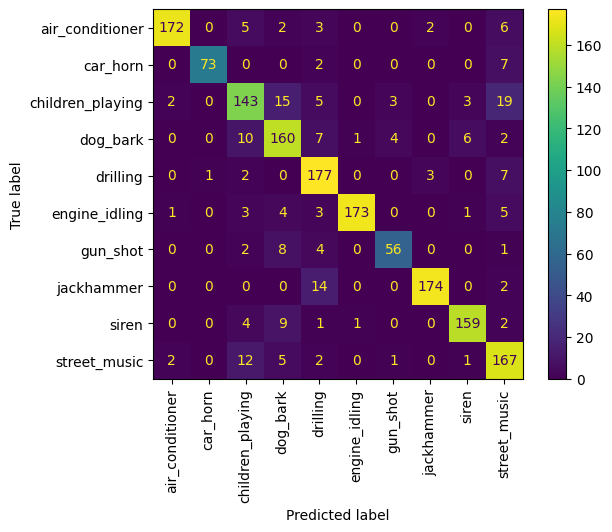

In [30]:

model.eval()
y_true = []
y_pred = []
with torch.inference_mode():
    for i, (input_batch, target_batch) in enumerate(val_dataset):
        output = model(input_batch.unsqueeze(1))
        _, preds = torch.max(output, 1)
        y_true.extend(target_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
    
print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes )
disp.plot( values_format = 'd', cmap='viridis', xticks_rotation='vertical', ax=None)

                  precision    recall  f1-score   support

 air_conditioner       0.99      0.94      0.96       760
        car_horn       0.99      0.98      0.99       326
children_playing       0.93      0.90      0.92       760
        dog_bark       0.91      0.96      0.93       760
        drilling       0.93      0.97      0.95       760
   engine_idling       0.99      0.96      0.98       760
        gun_shot       0.97      0.90      0.93       284
      jackhammer       1.00      0.95      0.97       760
           siren       0.99      0.95      0.97       706
    street_music       0.84      0.97      0.90       760

        accuracy                           0.95      6636
       macro avg       0.96      0.95      0.95      6636
    weighted avg       0.95      0.95      0.95      6636



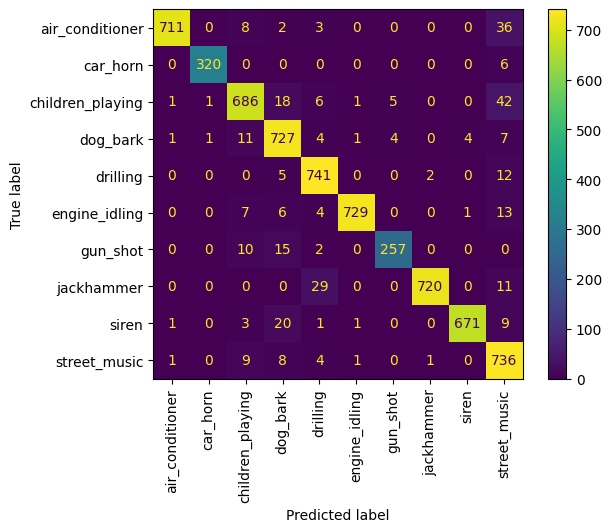

In [31]:

model.eval()
y_true = []
y_pred = []
with torch.inference_mode():
    for i, (input_batch, target_batch) in enumerate(train_dataset):
        output = model(input_batch.unsqueeze(1))
        _, preds = torch.max(output, 1)
        y_true.extend(target_batch.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
    
print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot( values_format = 'd', cmap='viridis', xticks_rotation='vertical', ax=None)